# Example notebook `neuralib.atlas`

In [1]:
import matplotlib.pyplot as plt

from neuralib.atlas.data import get_children
from neuralib.atlas.view import get_slice_view

In [2]:
%load_ext autoreload
%autoreload

### Example of ML offset in coronal slice

- Use `plane.with_angle_offset(deg_x=...)` for ML axis offset in a reference view

Text(0.5, 1.0, '+10 degree ML offset')

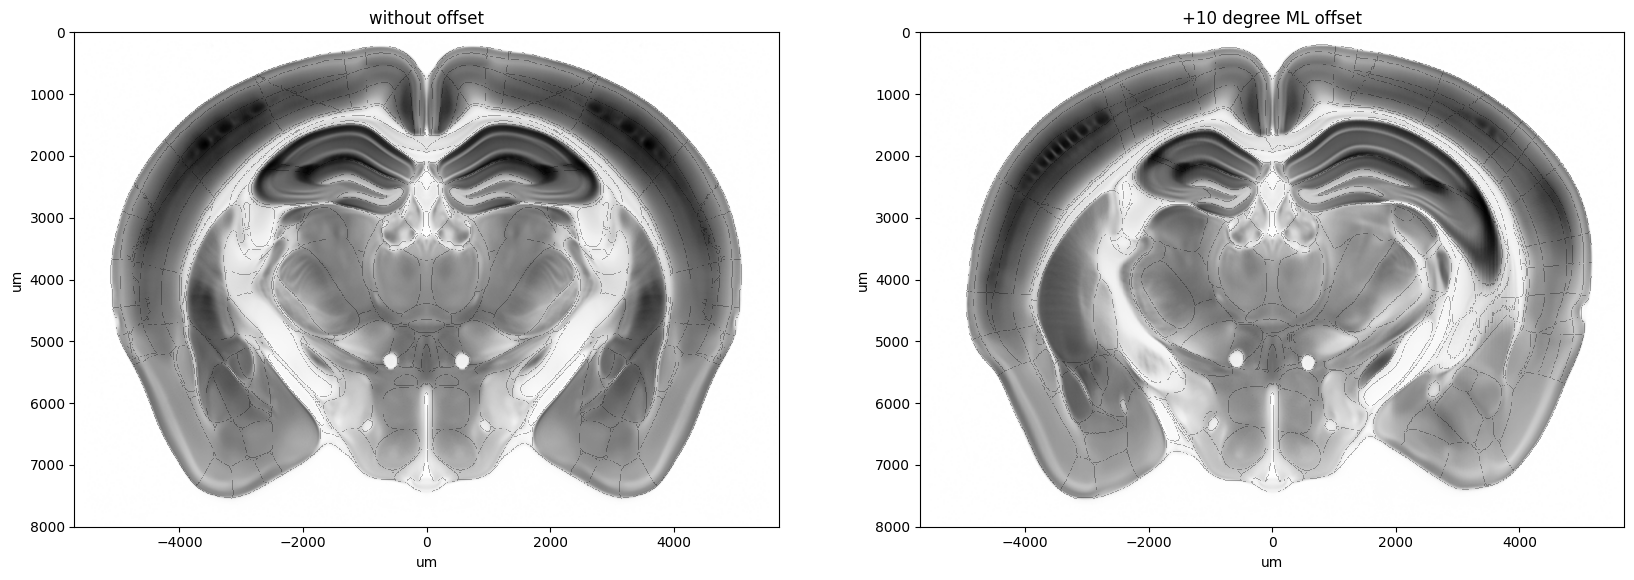

In [3]:
slice_index = 700
plane = get_slice_view('reference', plane_type='coronal', resolution=10).plane_at(slice_index)

_, ax = plt.subplots(ncols=2, figsize=(20, 10))

plane.plot(ax=ax[0], boundaries=True)
ax[0].set_title('without offset')

plane.with_angle_offset(deg_x=10).plot(ax=ax[1], boundaries=True)
ax[1].set_title('+10 degree ML offset')

### Example of DV offset in sagittal slice

- Use `plane.with_angle_offset(deg_y=...)` for DV axis offset in an annotation view

Text(0.5, 1.0, '+20 degree DV offset')

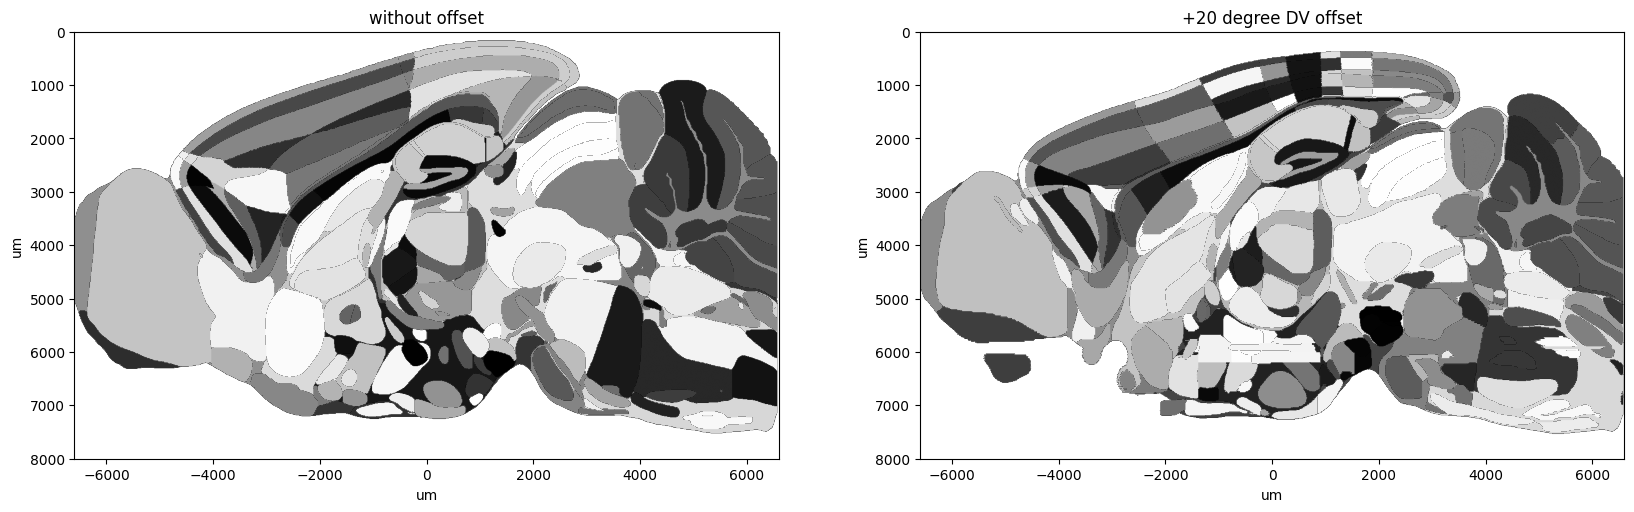

In [4]:
slice_index = 500
plane = get_slice_view('annotation', plane_type='sagittal', resolution=10).plane_at(slice_index)

_, ax = plt.subplots(ncols=2, figsize=(20, 10))
plane.plot(ax=ax[0], boundaries=True)
ax[0].set_title('without offset')

plane.with_angle_offset(deg_y=20).plot(ax=ax[1], boundaries=True)
ax[1].set_title('+20 degree DV offset')

### Example of Annotate regions
- Annotation Hippocampal CA1 and Primary Visual Cortex (VISp)
- Also works in offset view and detailed tree regions

['VISp1', 'VISp2/3', 'VISp4', 'VISp5', 'VISp6a', 'VISp6b']


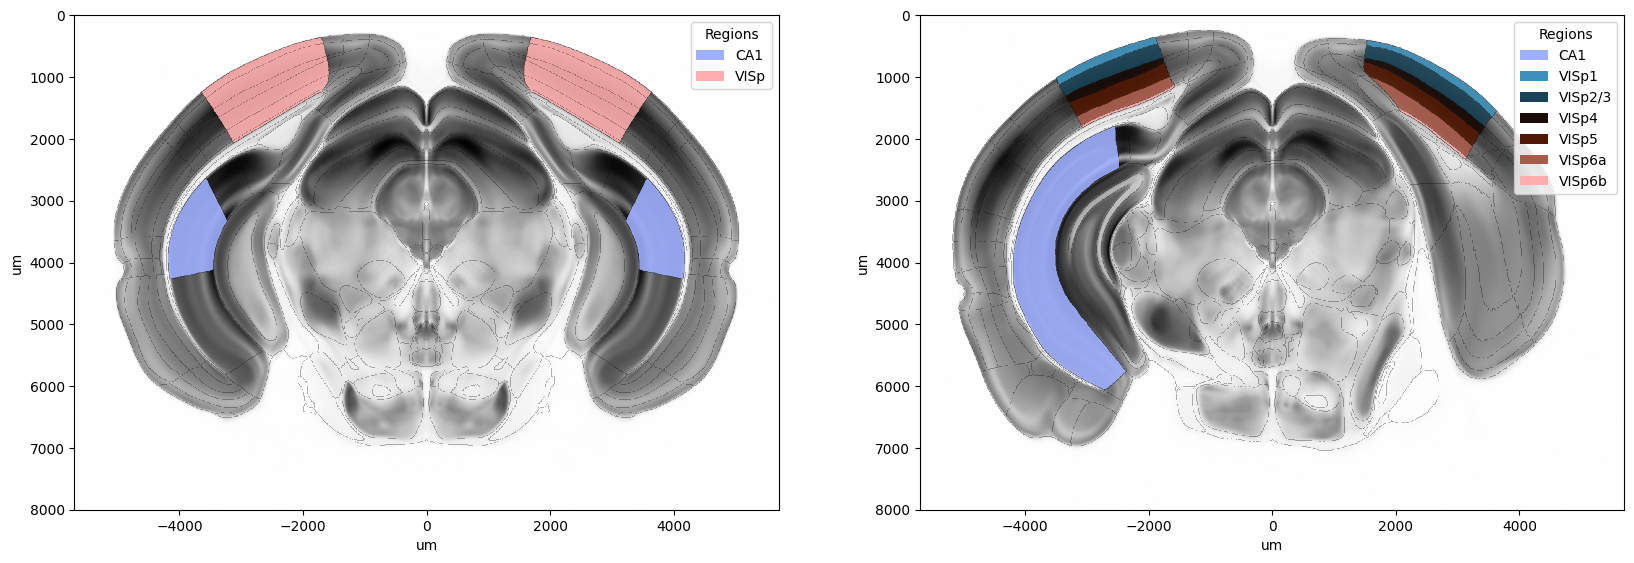

In [5]:
slice_index = 900
plane = get_slice_view('reference', plane_type='coronal', resolution=10).plane_at(slice_index)

_, ax = plt.subplots(ncols=2, figsize=(20, 10))
plane.plot(ax=ax[0], boundaries=True, annotation_region=['CA1', 'VISp'])

#
primary_visual_layers = get_children('VISp', dataframe=False)
print(primary_visual_layers)
plane.with_angle_offset(deg_x=10).plot(ax=ax[1], boundaries=True, annotation_region=['CA1'] + primary_visual_layers)


### Example of Annotate regions in transverse view

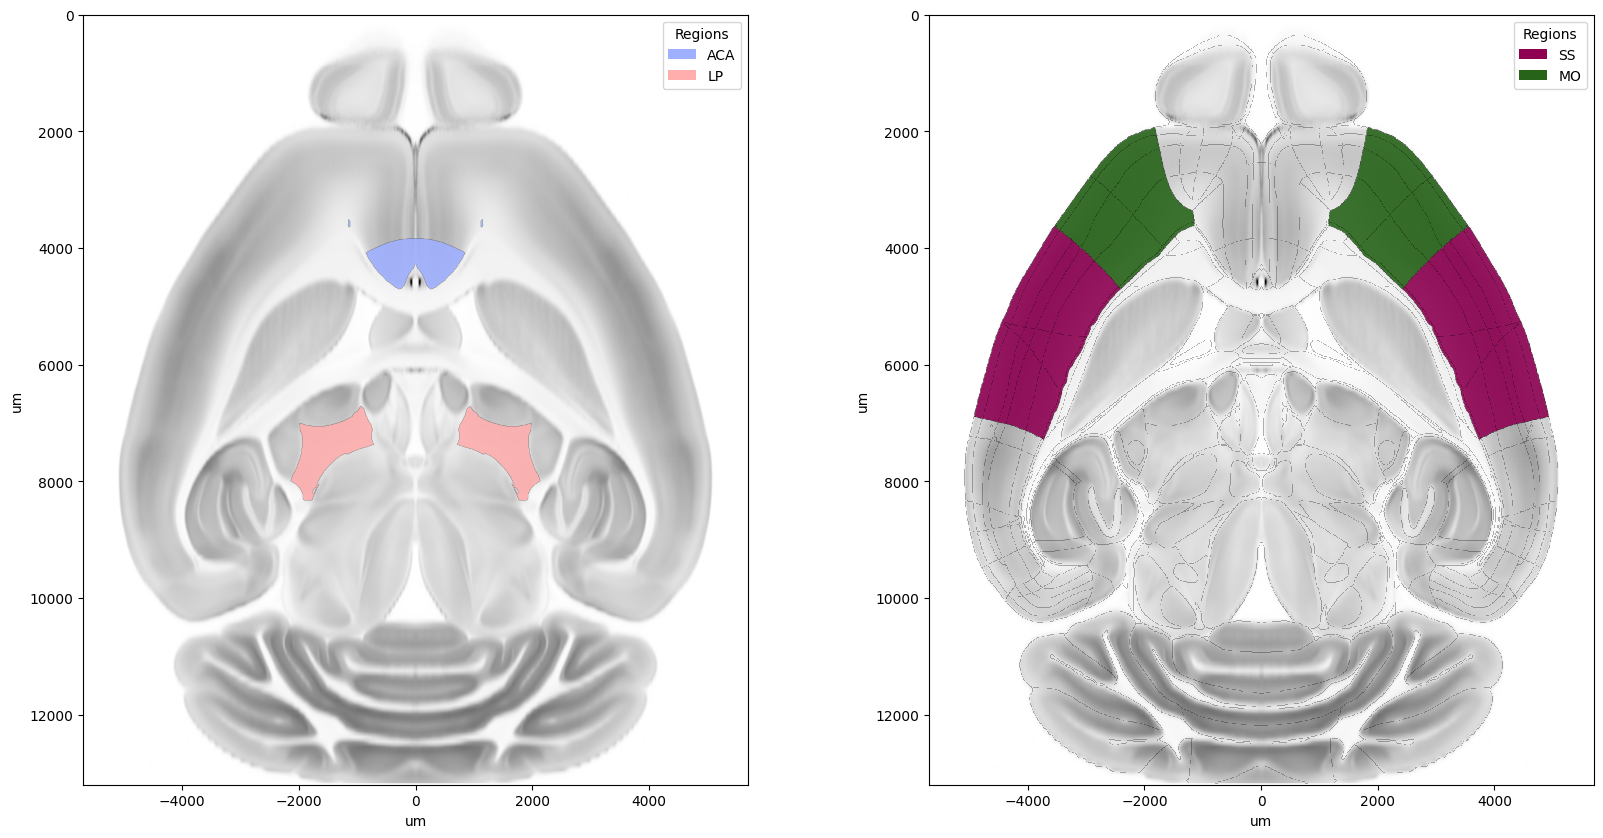

In [6]:
slice_index = 300
plane = get_slice_view('reference', plane_type='transverse', resolution=10).plane_at(slice_index)

_, ax = plt.subplots(ncols=2, figsize=(20, 10))
plane.plot(ax=ax[0], annotation_region=['ACA', 'LP'])
plane.plot(ax=ax[1], annotation_region=['SS', 'MO'], annotation_cmap='PiYG', boundaries=True)

### Example of max projection
- All visual areas max projection in transverse section plane


['VISal', 'VISam', 'VISl', 'VISli', 'VISpl', 'VISpor', 'VISp', 'VISpm']


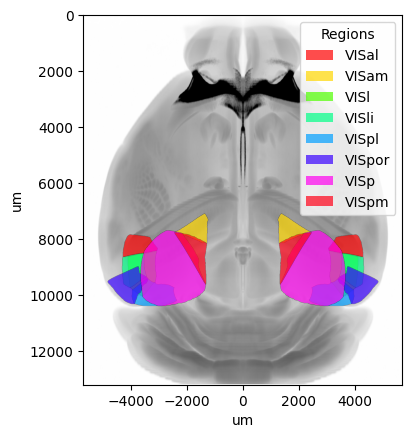

In [7]:
view = get_slice_view('reference', plane_type='transverse', resolution=10)

_, ax = plt.subplots()
regions = get_children('VIS')
print(regions)
view.plot_max_projection(ax, annotation_regions=regions)